# Import Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver


Set URL and define Selenium webdriver. In this case, bs4 is unable to retrieve information from Javascript website. Please note that the Chrome webdriver should be the same version as Chrome that is installed in your machine. The webdriver itself can be downloaded from Google website. 

In [2]:


url = 'https://www.thairath.co.th/news/business'
driver = webdriver.Chrome('C:\Program Files\Google\chromedriver.exe')
driver.get(url)


Response 200 = OK!

<html lang="th">
 <head>
  <meta charset="utf-8"/>
  <link data-react-helmet="true" href="https://www.thairath.co.th/news/business" rel="canonical"/>
  <link data-react-helmet="true" href="https://www.thairath.co.th/assets/images/thairath_logo2.jpg" rel="image_src"/>
  <meta content="ข่าวเศรษฐกิจ ราคาหุ้น ทอง น้ำมัน อสังหาฯ การเงิน | ไทยรัฐออนไลน์" data-react-helmet="true" property="og:title"/>
  <meta content="https://www.thairath.co.th/news/business" data-react-helmet="true" property="og:url"/>
  <meta content="ข่าวหุ้น ข่าวเศรษฐกิจวันนี้ ข่าวเศรษฐกิจล่าสุด AEC เศรษฐกิจโลก เศรษฐกิจไทย วิเคราะห์แนวโน้มเศรษฐกิจ การเงิน ทิศทางการลงทุน เช็คราคาหุ้น ทอง น้ำมัน อสังหาริมทรัพย์ โดยทีมข่าวเศรษฐกิจไทยรัฐออนไลน์" data-react-helmet="true" property="og:description"/>
  <meta content="https://www.thairath.co.th/assets/images/thairath_logo2.jpg" data-react-helmet="true" property="og:image"/>
  <meta content="frontpage" data-react-helmet="true" name="cXenseParse:pageclass"/>
  <meta content="หุ้น, 
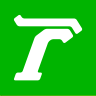
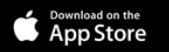
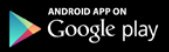
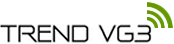

In [3]:
soup = BeautifulSoup(driver.page_source, 'lxml')

driver.close() # do not forget to close the webdriver
print(soup.prettify())

## Select section `ข่าวอื่นๆ` in order to navigate through news

In [17]:
sel = soup.find('h3', text='ข่าวอื่นๆ').find_next('div').find_all('a')

sel

[<a href="/news/business/1886753"><img alt="ชงตั้งศูนย์ฟื้นฟูเศรษฐกิจ “บิ๊กตู่” รับข้อเสนอบูรณาการทุกส่วนกู้ประเทศ" class="css-ckexjm erf07a90" src="https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slAMxK91N5BKgmMLgq13FxdO3Ya.jpg"/></a>,
 <a href="/news/business/1886753">ชงตั้งศูนย์ฟื้นฟูเศรษฐกิจ “บิ๊กตู่” รับข้อเสนอบูรณาการทุกส่วนกู้ประเทศ</a>,
 <a href="/news/business/1886473"><img alt='"เราเที่ยวด้วยกัน" เปิดให้เช็ก ร้านอาหาร โรงแรม ที่เข้าร่วมโครงการแล้ว' class="css-ckexjm erf07a90" src="https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slALXDzEWmf6vnsxUNPVZD6S3tm.jpg"/></a>,
 <a href="/news/business/1886473">"เราเที่ยวด้วยกัน" เปิดให้เช็ก ร้านอาหาร โรงแรม ที่เข้าร่วมโครงการแล้ว</a>,
 <a href="/news/business/1886795"><img alt='ผุด "ศูนย์ฟื้นฟู ศก." กู้พิษโควิดฯ ยึดโมเดล ศบค.แก้ปัญหาม้วนเดียวจบ' class="css-ckexjm erf07a90" src="https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slAMwmApR4nJ4vO3CYsY59mN5ww.jpg"/></a>,
 <a href="/news/business/1886795">ผุด "ศูนย์ฟื้นฟู ศก." กู้พิษโควิ

In [18]:
len(sel)

24

In [29]:
sel[0]

<a href="/news/business/1886753"><img alt="ชงตั้งศูนย์ฟื้นฟูเศรษฐกิจ “บิ๊กตู่” รับข้อเสนอบูรณาการทุกส่วนกู้ประเทศ" class="css-ckexjm erf07a90" src="https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slAMxK91N5BKgmMLgq13FxdO3Ya.jpg"/></a>

In [33]:
sel[0]['href']

'/news/business/1886753'

In [36]:
ss = sel[0].find('img')['src']
ss

'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slAMxK91N5BKgmMLgq13FxdO3Ya.jpg'

In [22]:
sel[1]

<a href="/news/business/1886753">ชงตั้งศูนย์ฟื้นฟูเศรษฐกิจ “บิ๊กตู่” รับข้อเสนอบูรณาการทุกส่วนกู้ประเทศ</a>

It is found that the a-tags next to the `ข่าวอื่นๆ` section contain a pair of links for each news. In specific, it has clickable image and headline with link. Therefore, there are 2 times a-tags than required. In this case, only the first one from the pair is selected.

In [43]:
# collect news links and images. Prepare to navigate through these links.
link_l = []
img_l = []
news = {'title': [], 'pub_date': [], 'desc': [], 'tag': [], 'cover_img': [], 'url': [], 'cat': []}
for i, s in enumerate(sel):
    if i%2 == 1:
        continue
    news['url'].append('https://www.thairath.co.th'+s['href']) 
    news['cover_img'].append(s.find('img')['src'])
    news['title'].append(s.find('img')['alt'])

In [44]:
news['url']

['https://www.thairath.co.th/news/business/1886753',
 'https://www.thairath.co.th/news/business/1886473',
 'https://www.thairath.co.th/news/business/1886795',
 'https://www.thairath.co.th/news/business/1886784',
 'https://www.thairath.co.th/news/business/1886508',
 'https://www.thairath.co.th/news/business/1886495',
 'https://www.thairath.co.th/news/business/1886423',
 'https://www.thairath.co.th/news/business/1886413',
 'https://www.thairath.co.th/news/business/stocks-gold/1886315',
 'https://www.thairath.co.th/news/business/1885045',
 'https://www.thairath.co.th/news/business/1886135',
 'https://www.thairath.co.th/news/business/finance-banking/1886164']

In [54]:
news['url'][-1].split('/')

['https:',
 '',
 'www.thairath.co.th',
 'news',
 'business',
 'finance-banking',
 '1886164']

In [55]:
news['url'][-1].split('/')[4]

'business'

In [45]:
news['cover_img']

['https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slAMxK91N5BKgmMLgq13FxdO3Ya.jpg',
 'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slALXDzEWmf6vnsxUNPVZD6S3tm.jpg',
 'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slAMwmApR4nJ4vO3CYsY59mN5ww.jpg',
 'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slAMwkHPIFdS4TlfhSLaPKz5nxQ.jpg',
 'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slAL9RSfCMTqHVG298g9nNCavfC.jpg',
 'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slALV2mFp5rQJ2RYfa4EX9uX358.jpg',
 'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slALWqGugJUJZPy3DXjgh084yP5.jpg',
 'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slALW1vHZtVzn74r46LPuEAh20N.jpg',
 'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slAOy9ONpgRF4vFU0253aPXJ1ss.jpg',
 'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8sk3m31RhIZ8HrOhkpph40Tsizju.jpg',
 'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8slAN9oa3RGrJwSBJBJzmgXhs9z9.jpg',
 'https://www.thairath.co.th/media/4DQpjUtzLUwmJZZO8sl

In [46]:
news['title']

['ชงตั้งศูนย์ฟื้นฟูเศรษฐกิจ “บิ๊กตู่” รับข้อเสนอบูรณาการทุกส่วนกู้ประเทศ',
 '"เราเที่ยวด้วยกัน" เปิดให้เช็ก ร้านอาหาร โรงแรม ที่เข้าร่วมโครงการแล้ว',
 'ผุด "ศูนย์ฟื้นฟู ศก." กู้พิษโควิดฯ ยึดโมเดล ศบค.แก้ปัญหาม้วนเดียวจบ',
 'ก.คมนาคม ถก ทูตญี่ปุ่น จับคู่เดินทางระหว่างประเทศ คาดสรุปได้สัปดาห์หน้า',
 'กองสลากฯ ยอมรับหวยงวด 1 ส.ค.63 หลุดขายก่อนกำหนด ยันขึ้นเงินได้ปกติ',
 'อย่าลืมแวะเติม ปตท. บางจาก ประกาศปรับขึ้น "ราคาน้ำมัน" ทุกชนิด',
 'เราเที่ยวด้วยกัน ตอบ 8 คำถามคาใจ เตรียมพร้อมก่อนลงทะเบียนชิงสิทธิ์เที่ยว',
 'คลัง สมทบให้ครบ 5,000 ช่วยประกันสังคมจ่ายผู้ประกันตนทำงานไม่ถึง 26 วัน',
 'หุ้นไทยวันนี้ ปิดตลาดเช้า ปรับลด 8.70 ดัชนีอยู่ที่ 1,322 จุด',
 "ตรวจสอบสิทธิ์ 'เยียวยาเกษตรกร' เช็กด่วน ธ.ก.ส. โอนเงินให้กลุ่มแจ้งบัญชีใหม่แล้ว",
 'วิธีลงทะเบียน www.เราเที่ยวด้วยกัน.com ชิงสิทธิ์แจกเงินเที่ยว จำนวนจำกัด (คลิป)',
 'ตลาดตราสารหนี้ผวา หลังเจอโควิด-19 ทำ 6 เดือนแรกเอกชนออกขายหุ้นกู้ลดลง']

<html lang="th">
 <head>
  <meta charset="utf-8"/>
  <link data-react-helmet="true" href="https://www.thairath.co.th/news/business/1886753" rel="canonical"/>
  <link data-react-helmet="true" href="https://www.thairath.co.th/media/dFQROr7oWzulq5FZUECroFFdX5kBhiSY2Xdz8F80X5zqmHQNLTOzWnbJ2caLHjezk7C.jpg" rel="image_src"/>
  <meta content="ชงตั้งศูนย์ฟื้นฟูเศรษฐกิจ “บิ๊กตู่” รับข้อเสนอบูรณาการทุกส่วนกู้ประเทศ" data-react-helmet="true" property="og:title"/>
  <meta content="https://www.thairath.co.th/news/business/1886753" data-react-helmet="true" property="og:url"/>
  <meta content="นายกฯเปิดเวทีหารือทีมที่ปรึกษาเศรษฐกิจชุดใหญ่ รับข้อเสนอตั้งศูนย์ฟื้นฟูเศรษฐกิจ รูปแบบเดียวกับ ศบค.พร้อมชงให้นายกฯนั่งเป็นประธาน เพื่อให้บูรณาการระหว่างหน่วยงาน" data-react-helmet="true" property="og:description"/>
  <meta content="https://www.thairath.co.th/media/dFQROr7oWzulq5FZUECroFFdX5kBhiSY2Xdz8F80X5zqmHQNLTOzWnbJ2caLHjezk7C.jpg" data-react-helmet="true" property="og:image"/>
  <meta content="2020-07-11T0
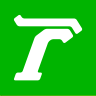
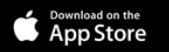
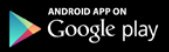
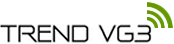

In [47]:
driver = webdriver.Chrome('C:\Program Files\Google\chromedriver.exe')
driver.get(news['url'][0])
soup = BeautifulSoup(driver.page_source, 'lxml')

driver.close()
print(soup.prettify())

In [50]:
soup.find('meta', property='article:published_time')['content']

'2020-07-11T07:01:00+07:00'

In [75]:
from datetime import datetime
t = datetime.strptime(soup.find('meta', property='article:published_time')['content'][:-6], '%Y-%m-%dT%H:%M:%S')
print(t.strftime('%Y-%m-%d'))

2020-07-11


In [52]:
tags = soup.find('h2', text='แท็กที่เกี่ยวข้อง').find_next('div').find_all('span')
tags[0].text

'ฟื้นฟูเศรษฐกิจ'

In [60]:
contents = soup.find('article', id='article-content').find_all('p')

contents

[<p><strong>นายกฯเปิดเวทีหารือทีมที่ปรึกษาเศรษฐกิจชุดใหญ่ รับข้อเสนอตั้งศูนย์ฟื้นฟูเศรษฐกิจ</strong> รูปแบบเดียวกับ ศบค.พร้อมชงให้นายกฯนั่งเป็นประธาน เพื่อให้บูรณาการระหว่างหน่วยงาน พร้อมหามาตรการช่วยเอสเอ็มอีเข้าถึงเงินทุนให้ได้ เอกชนถามกลางที่ประชุมห่วงสถานการณ์การเมือง คลุมเครือ หวั่นข้าราชการเกียร์ว่าง ด้านสภาธุรกิจตลาดทุน ขอนายกฯ เร่งตั้งตลาดหุ้น SME หวังช่วยกลุ่มธุรกิจรายย่อยเข้มแข็ง</p>,
 <p>ผู้สื่อข่าวรายงานจากทำเนียบรัฐบาลว่า <strong>พล.อ.ประยุทธ์ จันทร์โอชา นายกรัฐมนตรี</strong> ได้เป็นประธานการประชุมหารือแนวทางการช่วยเหลือและฟื้นฟูเศรษฐกิจจากการแพร่ระบาดของโรคติดเชื้อไวรัสโคโรนา 2019 (โควิด-19) โดยมีวาระการหารือเรื่อง 1.รายงานสถานการณ์เศรษฐกิจ และกรอบการขับเคลื่อนเศรษฐกิจไทยในช่วงที่เหลือของปี 63 2. การช่วยเหลือและฟื้นฟูวิสาหกิจขนาดกลางและขนาดย่อม (SMEs) ที่ได้รับผลกระทบจาก Covid-19 โดยมีนายสมคิด จาตุศรีพิทักษ์ รองนายกรัฐมนตรี นายอุตตม สาวนายน รมว.คลัง และนายกอบศักดิ์ ภูตระกูล รองเลขาธิการนายกรัฐมนตรีฝ่ายการเมืองและเลขานุการคณะรัฐมนตรีฝ่ายเศรษฐกิจเข้าร่วม</p>,
 <p>โดยนายกอบศ

In [61]:
len(contents)

8

In [65]:
''.join([str(c) for c in contents])

'<p><strong>นายกฯเปิดเวทีหารือทีมที่ปรึกษาเศรษฐกิจชุดใหญ่ รับข้อเสนอตั้งศูนย์ฟื้นฟูเศรษฐกิจ</strong> รูปแบบเดียวกับ ศบค.พร้อมชงให้นายกฯนั่งเป็นประธาน เพื่อให้บูรณาการระหว่างหน่วยงาน พร้อมหามาตรการช่วยเอสเอ็มอีเข้าถึงเงินทุนให้ได้ เอกชนถามกลางที่ประชุมห่วงสถานการณ์การเมือง คลุมเครือ หวั่นข้าราชการเกียร์ว่าง ด้านสภาธุรกิจตลาดทุน ขอนายกฯ เร่งตั้งตลาดหุ้น SME หวังช่วยกลุ่มธุรกิจรายย่อยเข้มแข็ง</p><p>ผู้สื่อข่าวรายงานจากทำเนียบรัฐบาลว่า <strong>พล.อ.ประยุทธ์ จันทร์โอชา นายกรัฐมนตรี</strong> ได้เป็นประธานการประชุมหารือแนวทางการช่วยเหลือและฟื้นฟูเศรษฐกิจจากการแพร่ระบาดของโรคติดเชื้อไวรัสโคโรนา 2019 (โควิด-19) โดยมีวาระการหารือเรื่อง 1.รายงานสถานการณ์เศรษฐกิจ และกรอบการขับเคลื่อนเศรษฐกิจไทยในช่วงที่เหลือของปี 63 2. การช่วยเหลือและฟื้นฟูวิสาหกิจขนาดกลางและขนาดย่อม (SMEs) ที่ได้รับผลกระทบจาก Covid-19 โดยมีนายสมคิด จาตุศรีพิทักษ์ รองนายกรัฐมนตรี นายอุตตม สาวนายน รมว.คลัง และนายกอบศักดิ์ ภูตระกูล รองเลขาธิการนายกรัฐมนตรีฝ่ายการเมืองและเลขานุการคณะรัฐมนตรีฝ่ายเศรษฐกิจเข้าร่วม</p><p>โดยนายกอบศักดิ์ 

In [66]:
''.join([c.text for c in contents])

'นายกฯเปิดเวทีหารือทีมที่ปรึกษาเศรษฐกิจชุดใหญ่ รับข้อเสนอตั้งศูนย์ฟื้นฟูเศรษฐกิจ รูปแบบเดียวกับ ศบค.พร้อมชงให้นายกฯนั่งเป็นประธาน เพื่อให้บูรณาการระหว่างหน่วยงาน พร้อมหามาตรการช่วยเอสเอ็มอีเข้าถึงเงินทุนให้ได้ เอกชนถามกลางที่ประชุมห่วงสถานการณ์การเมือง คลุมเครือ หวั่นข้าราชการเกียร์ว่าง ด้านสภาธุรกิจตลาดทุน ขอนายกฯ เร่งตั้งตลาดหุ้น SME หวังช่วยกลุ่มธุรกิจรายย่อยเข้มแข็งผู้สื่อข่าวรายงานจากทำเนียบรัฐบาลว่า พล.อ.ประยุทธ์ จันทร์โอชา นายกรัฐมนตรี ได้เป็นประธานการประชุมหารือแนวทางการช่วยเหลือและฟื้นฟูเศรษฐกิจจากการแพร่ระบาดของโรคติดเชื้อไวรัสโคโรนา 2019 (โควิด-19) โดยมีวาระการหารือเรื่อง 1.รายงานสถานการณ์เศรษฐกิจ และกรอบการขับเคลื่อนเศรษฐกิจไทยในช่วงที่เหลือของปี 63 2. การช่วยเหลือและฟื้นฟูวิสาหกิจขนาดกลางและขนาดย่อม (SMEs) ที่ได้รับผลกระทบจาก Covid-19 โดยมีนายสมคิด จาตุศรีพิทักษ์ รองนายกรัฐมนตรี นายอุตตม สาวนายน รมว.คลัง และนายกอบศักดิ์ ภูตระกูล รองเลขาธิการนายกรัฐมนตรีฝ่ายการเมืองและเลขานุการคณะรัฐมนตรีฝ่ายเศรษฐกิจเข้าร่วมโดยนายกอบศักดิ์ เผยภายหลังการประชุมว่า นายกฯแจ้งว่าการประชุมทีมที่ป

In [ ]:
for i, url in enumerate(news['url']):
    driver = webdriver.Chrome()
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'lxml')

driver.close()